In [2]:
from pathlib import Path

import numpy as np
from datasets_utils import ds_load
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import json

In [47]:
print(int(17 - (32/2)))
print(int(17 + (32/2)))

1
33


In [ ]:
ds_name = 'PowerCons'
scaler = StandardScaler()
train_ds, test_ds = ds_load(Path('~/slow/UEA/data/arff_format').expanduser(), ds_name, scaler=scaler)

In [60]:
# np.savetxt('target_protos/PowerCons/class_0_proto_0.txt', np.load('experiments/ManualProtosPrep/run-2/PowerCons/protos/epoch-200/prototype-ts0.npy'))
np.savetxt('target_protos/PowerCons/class_0_proto_0.txt', scaler.inverse_transform(np.load('experiments/ManualProtosPrep/run-2/PowerCons/protos/epoch-200/prototype-ts-receptive_field000.npy')))
np.savetxt('target_protos/PowerCons/class_1_proto_0.txt', scaler.inverse_transform(np.load('experiments/ManualProtosPrep/run-2/PowerCons/protos/epoch-200/prototype-ts-receptive_field002.npy')))

In [64]:
np.loadtxt('target_protos/PowerCons/class_0_proto_0.txt').reshape(1, -1)

array([[1.95000005, 1.90999997, 1.87      , 1.87      , 1.87      ,
        1.87      , 1.86000001, 1.85000002, 1.84000003, 1.74000001,
        1.47000003, 1.19000006, 1.19000006, 1.20000005, 1.21000004,
        1.20000005, 1.17999995, 1.20000005, 1.23000002, 1.05999994,
        0.89999998, 0.58999997, 0.26999998, 0.23000002, 0.19      ,
        0.19      , 0.19      , 0.19      , 0.19999999, 0.19      ,
        0.17000002, 0.19      ]])

In [71]:
scaler.inverse_transform(np.load('experiments/ManualProtosPrep/run-2/PowerCons/protos/epoch-200/prototype-ts0.npy'))

array([[2.13      ],
       [1.99      ],
       [1.95      ],
       [1.91      ],
       [1.87      ],
       [1.87      ],
       [1.87      ],
       [1.87      ],
       [1.86      ],
       [1.85      ],
       [1.84      ],
       [1.74      ],
       [1.47      ],
       [1.19      ],
       [1.19      ],
       [1.2       ],
       [1.21      ],
       [1.2       ],
       [1.18      ],
       [1.2       ],
       [1.23      ],
       [1.06      ],
       [0.9       ],
       [0.59      ],
       [0.26999998],
       [0.23000002],
       [0.19      ],
       [0.19      ],
       [0.19      ],
       [0.19      ],
       [0.19999999],
       [0.19      ],
       [0.17000002]], dtype=float32)

# VAE, "contrastive pretraining" - similar to ProtoPNet

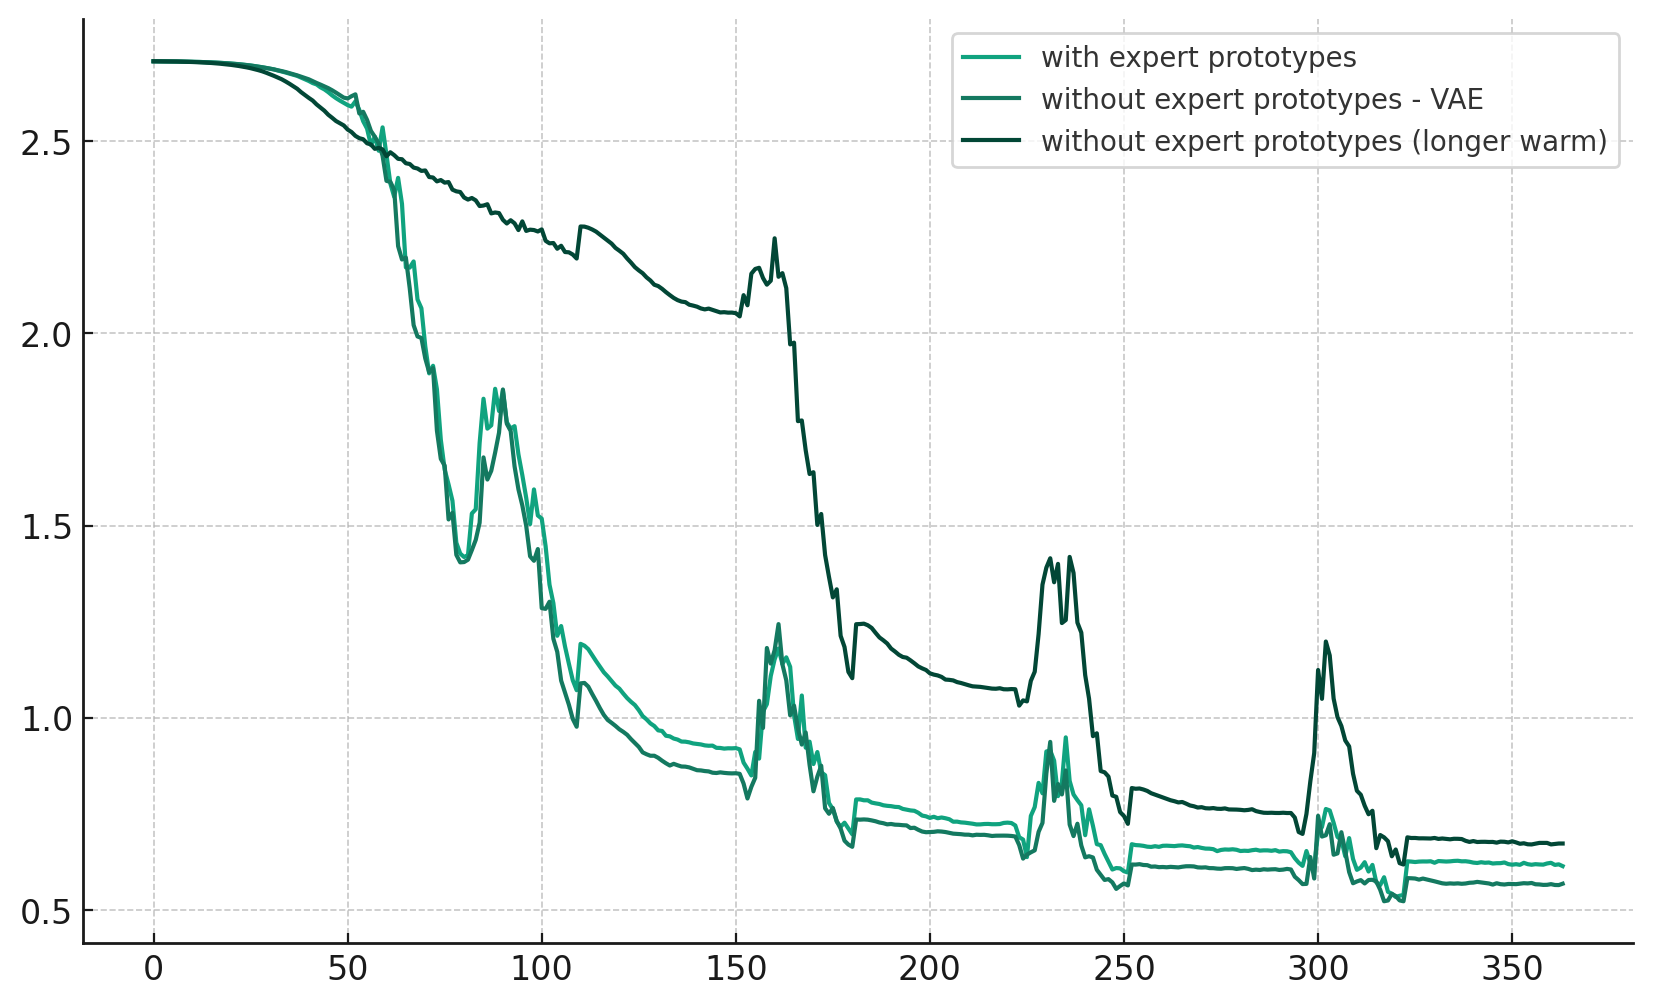

In [12]:
exp_path = Path('experiments/libras_expert_protos_vae_better_pretraining/with')

cross_ent_to_avg = []
for run in range(1, 6):
    run_dir = exp_path / f'run-{run}' / 'Libras'
    with open(run_dir / 'stats.json') as f:
        stats = json.load(f)
    cross_ent = np.array([e['value'] for e in stats['cross_ent_test']])
    cross_ent_to_avg.append(cross_ent)
cross_ent_avg_with = np.mean(cross_ent_to_avg, axis=0)

exp_path = Path('experiments/libras_expert_protos_vae/without')

cross_ent_without_to_avg = []
for run in range(1, 6):
    run_dir = exp_path / f'run-{run}' / 'Libras'
    with open(run_dir / 'stats.json') as f:
        stats = json.load(f)
    cross_ent = np.array([e['value'] for e in stats['cross_ent_test']])
    cross_ent_without_to_avg.append(cross_ent)
cross_ent_avg_without = np.mean(cross_ent_without_to_avg, axis=0)

exp_path = Path('experiments/libras_expert_protos/without')

cross_ent_without_to_avg = []
for run in range(2, 6):
    run_dir = exp_path / f'run-{run}' / 'Libras'
    with open(run_dir / 'stats.json') as f:
        stats = json.load(f)
    cross_ent = np.array([e['value'] for e in stats['cross_ent_test']])
    cross_ent_without_to_avg.append(cross_ent)
cross_ent_avg_without_ae = np.mean(cross_ent_without_to_avg, axis=0)

plt.plot(cross_ent_avg_with, label='with expert prototypes')
plt.plot(cross_ent_avg_without, label='without expert prototypes - VAE')
plt.plot(cross_ent_avg_without_ae, label='without expert prototypes (longer warm)')
plt.legend()


# Uczenie autoencodera na zaszumionych prototypach
# Zamiana enkodera na wariacyjny

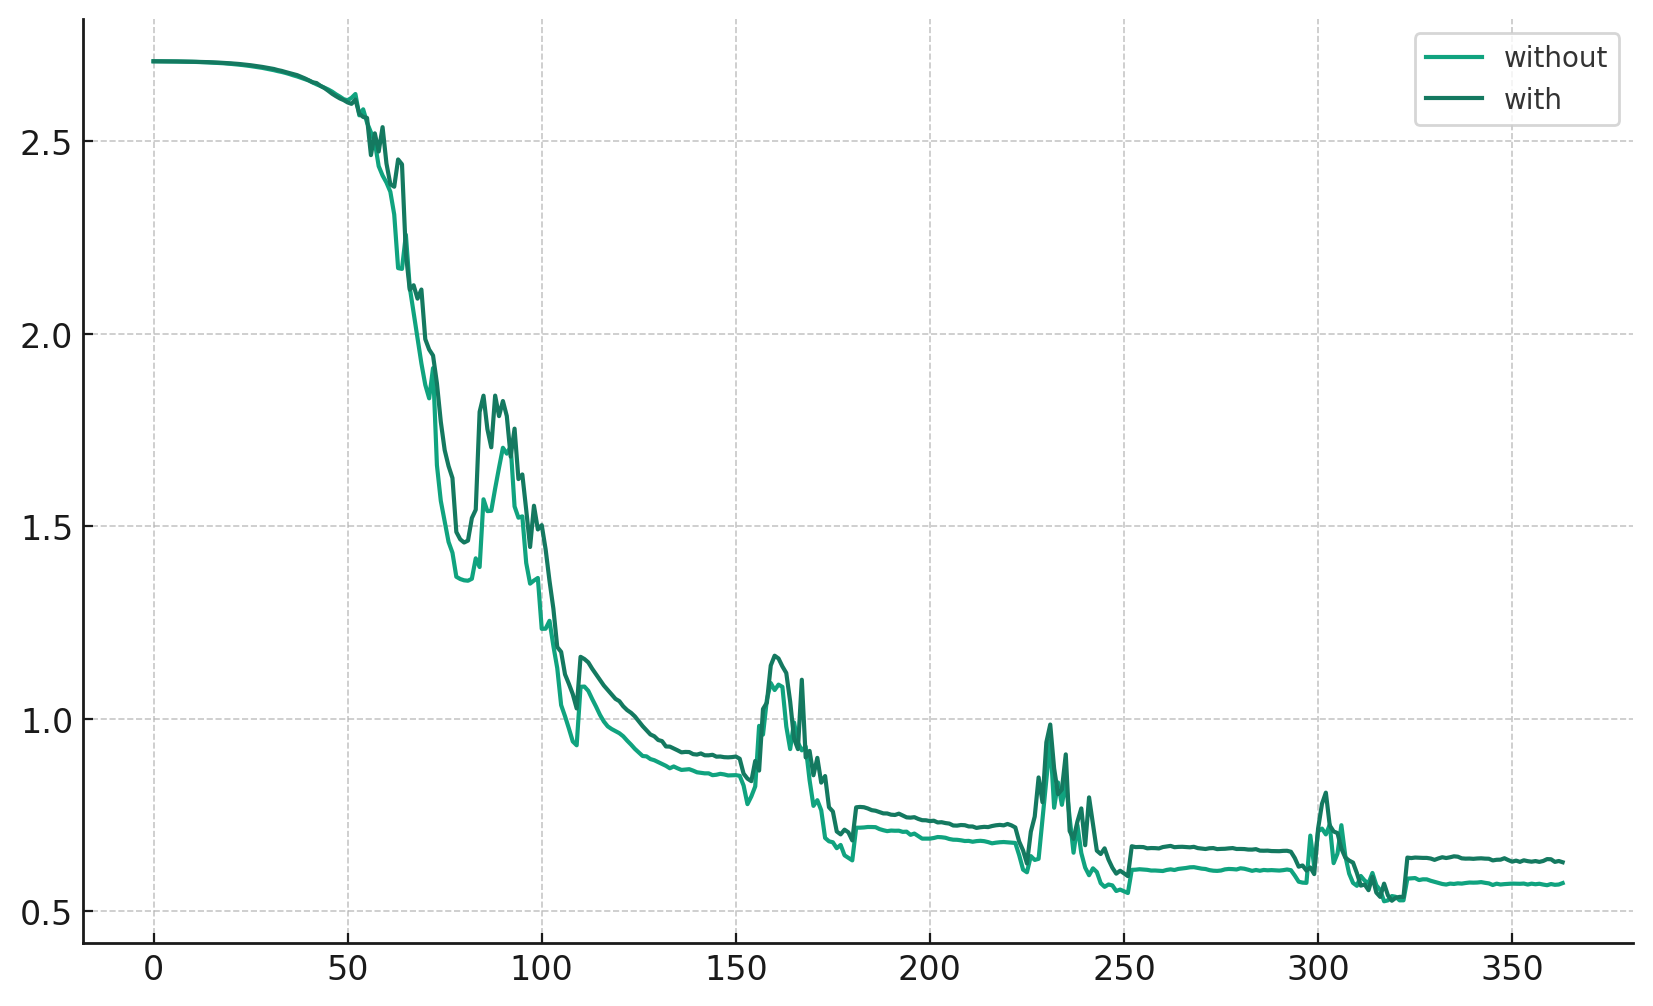

In [6]:
exp_path = Path('experiments/libras_expert_protos_vae/without')

RUNS = 3

cross_ent_to_avg = []
for run in range(1, RUNS + 1):
    run_dir = exp_path / f'run-{run}' / 'Libras'
    with open(run_dir / 'stats.json') as f:
        stats = json.load(f)
    cross_ent = np.array([e['value'] for e in stats['cross_ent_test']])
    cross_ent_to_avg.append(cross_ent)
cross_ent_avg_without = np.mean(cross_ent_to_avg, axis=0)

exp_path = Path('experiments/libras_expert_protos_vae_better_pretraining/with')

cross_ent_without_to_avg = []
for run in range(1, RUNS + 1):
    run_dir = exp_path / f'run-{run}' / 'Libras'
    with open(run_dir / 'stats.json') as f:
        stats = json.load(f)
    cross_ent = np.array([e['value'] for e in stats['cross_ent_test']])
    cross_ent_without_to_avg.append(cross_ent)
cross_ent_avg_with = np.mean(cross_ent_without_to_avg, axis=0)

plt.plot(cross_ent_avg_without, label='without')
plt.plot(cross_ent_avg_with, label='with')
plt.legend()


# Uczenie autoencodera na zaszumionych prototypach
# Zamiana enkodera na wariacyjny

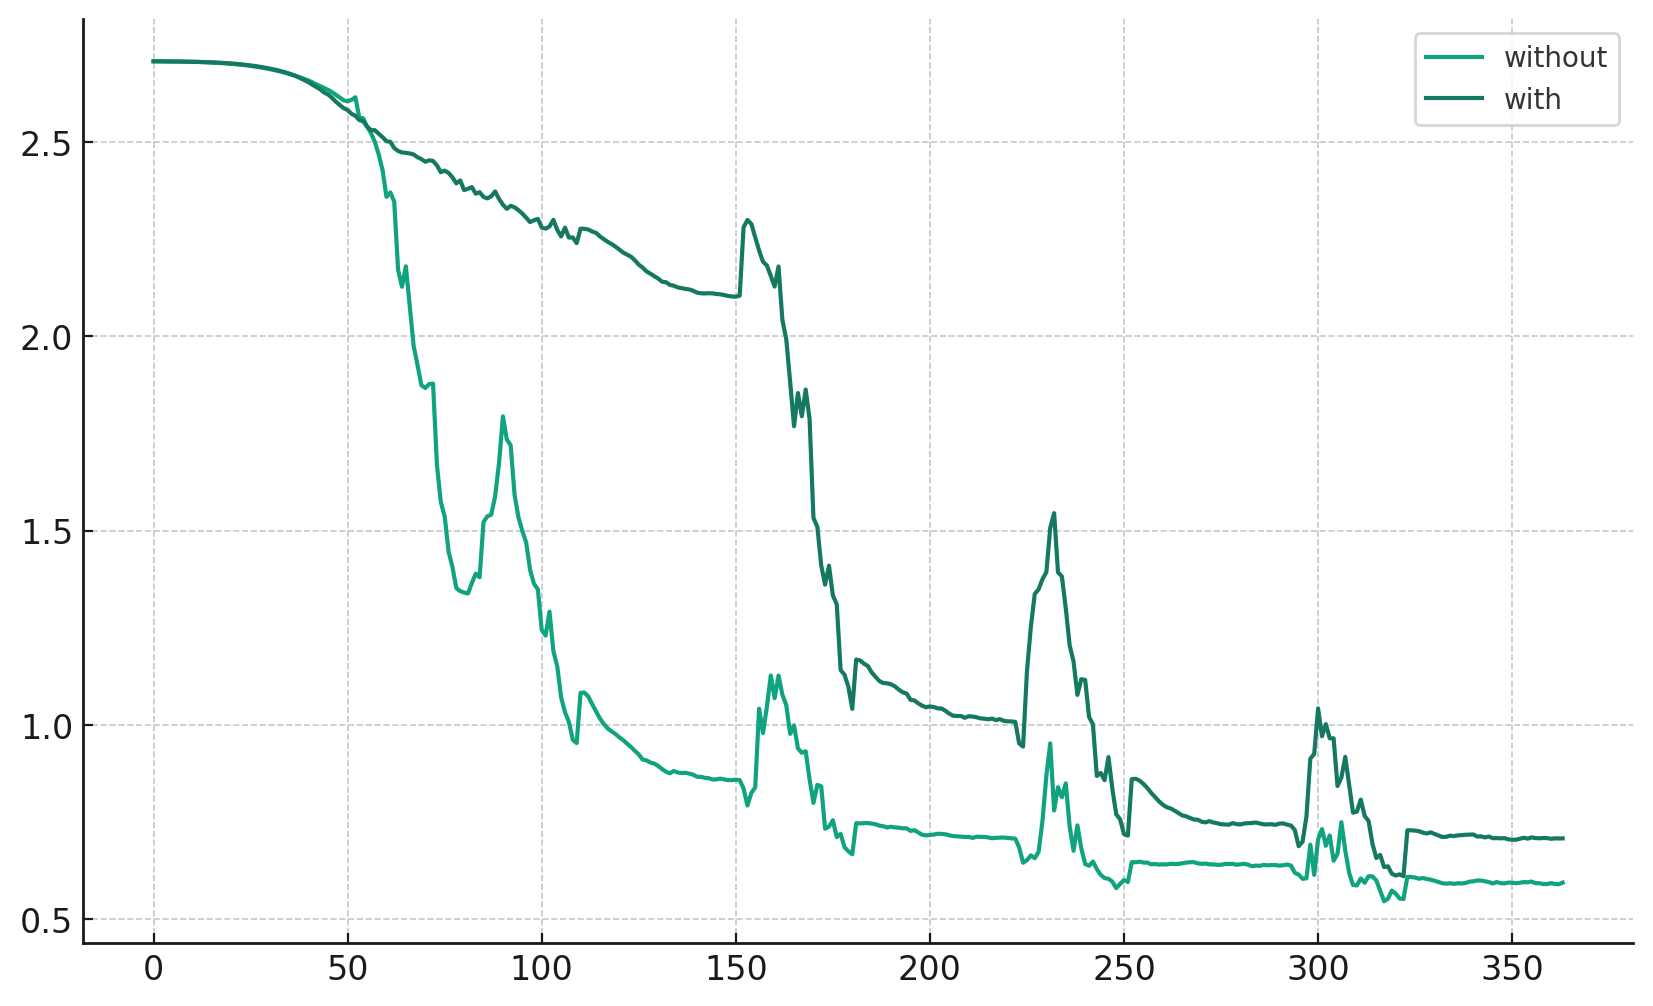

In [5]:
exp_path = Path('experiments/libras_expert_protos_vae/without')

RUNS = 4

cross_ent_to_avg = []
for run in range(1, RUNS + 1):
    run_dir = exp_path / f'run-{run}' / 'Libras'
    with open(run_dir / 'stats.json') as f:
        stats = json.load(f)
    cross_ent = np.array([e['value'] for e in stats['cross_ent_test']])
    cross_ent_to_avg.append(cross_ent)
cross_ent_avg_without = np.mean(cross_ent_to_avg, axis=0)

exp_path = Path('experiments/libras_expert_protos_vae/with')

cross_ent_without_to_avg = []
for run in range(1, RUNS + 1):
    run_dir = exp_path / f'run-{run}' / 'Libras'
    with open(run_dir / 'stats.json') as f:
        stats = json.load(f)
    cross_ent = np.array([e['value'] for e in stats['cross_ent_test']])
    cross_ent_without_to_avg.append(cross_ent)
cross_ent_avg_with = np.mean(cross_ent_without_to_avg, axis=0)

plt.plot(cross_ent_avg_without, label='without')
plt.plot(cross_ent_avg_with, label='with')
plt.legend()


# Uczenie autoencodera na zaszumionych prototypach
# Zamiana enkodera na wariacyjny

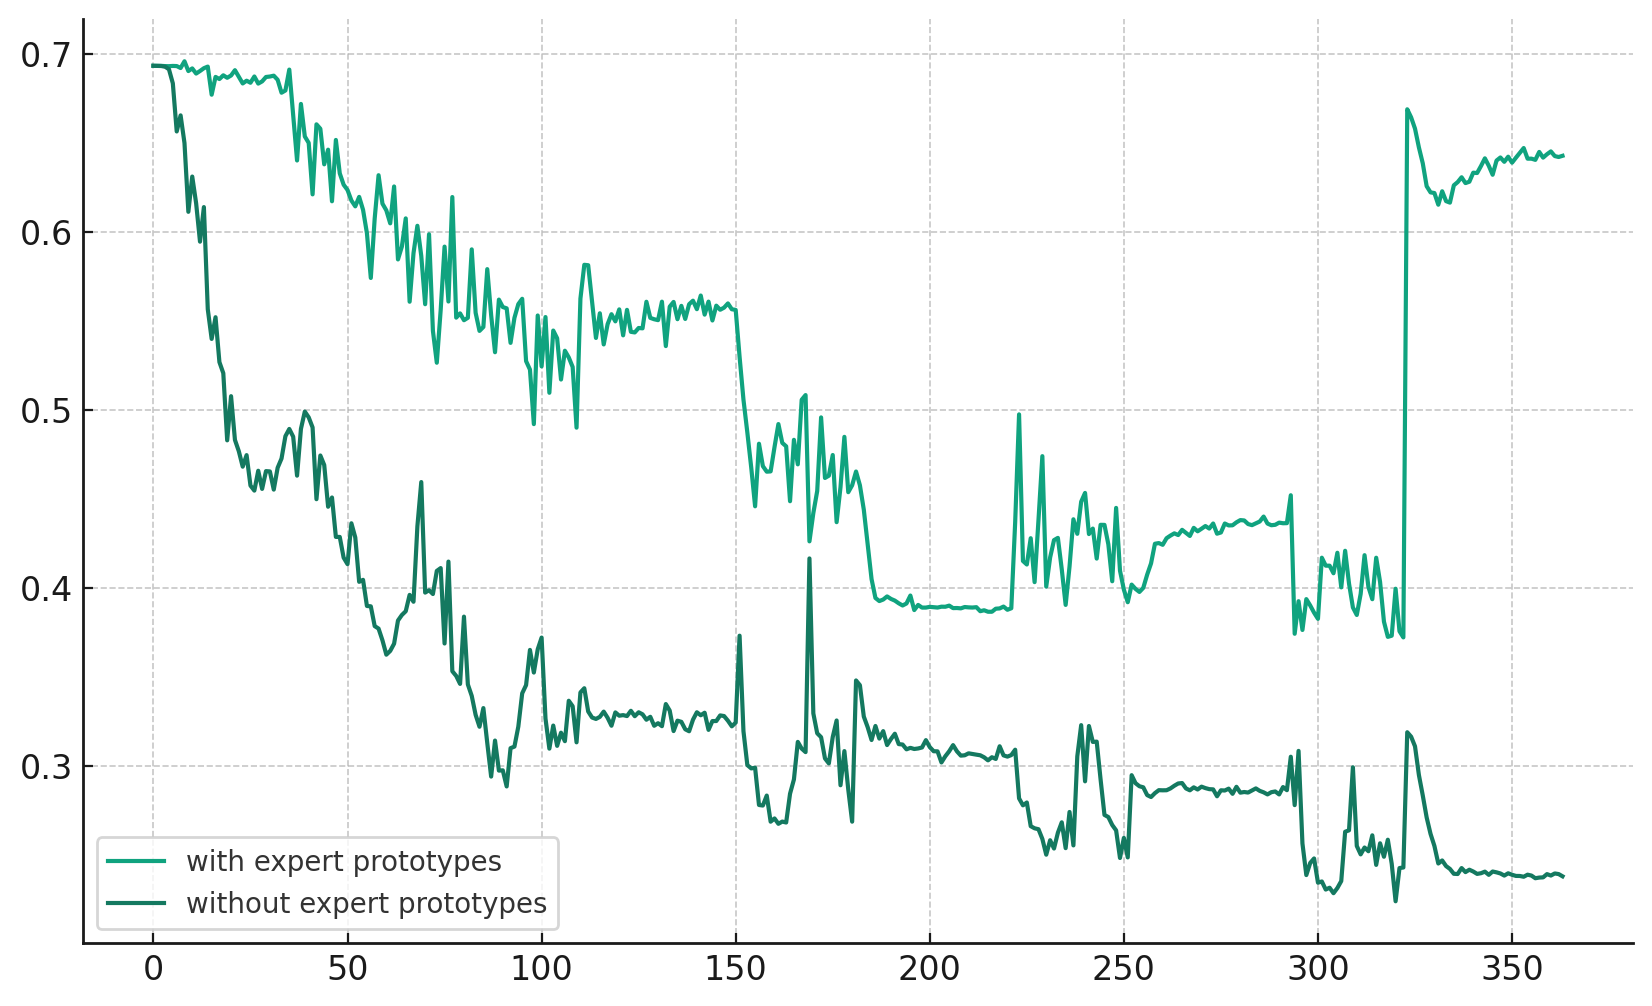

In [ ]:
# exp_path = Path('experiments/libras_expert_protos/with')
exp_path = Path('experiments/new_ta_expert_protos/with_expert')

cross_ent_to_avg = []
for run in range(1, 6):
    run_dir = exp_path / f'run-{run}'
    with open(run_dir / 'stats.json') as f:
        stats = json.load(f)
    cross_ent = np.array([e['value'] for e in stats['cross_ent_test']])
    cross_ent_to_avg.append(cross_ent)
cross_ent_avg_with = np.mean(cross_ent_to_avg, axis=0)

# exp_path = Path('experiments/libras_expert_protos/without')
exp_path = Path('experiments/new_ta_expert_protos/without_expert')

cross_ent_without_to_avg = []
for run in range(1, 6):
    run_dir = exp_path / f'run-{run}'
    with open(run_dir / 'stats.json') as f:
        stats = json.load(f)
    cross_ent = np.array([e['value'] for e in stats['cross_ent_test']])
    cross_ent_without_to_avg.append(cross_ent)
cross_ent_avg_without = np.mean(cross_ent_without_to_avg, axis=0)

plt.plot(cross_ent_avg_with, label='with expert prototypes')
plt.plot(cross_ent_avg_without, label='without expert prototypes')
plt.legend()


# Uczenie autoencodera na zaszumionych prototypach
# Zamiana enkodera na wariacyjny